# Name: Lee Hong Chen


## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv') # read ab_data csv file

df.head() # print out the top few rows

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
num_row = df.shape[0] # define the number of rows as "num_row"

print('The number of rows in the dataset (or df) is ' + str(num_row)) # print out the results

The number of rows in the dataset (or df) is 294478


c. The number of unique users in the dataset.

In [4]:
# define the number of unique users as "num_unique_user"
num_unique_user = df.user_id.nunique() 

# print out the results
print('The number of unique users in the dataset (or df) is ' + str(num_unique_user)) 

The number of unique users in the dataset (or df) is 290584


d. The proportion of users converted.

In [5]:
# define the proportion of users converted as "prop_user_converted"
prop_user_converted = df.converted.mean() * 100

# print out the results
print('The proportion of users converted in the dataset (or df) is ' + str(prop_user_converted) + '%') 

The proportion of users converted in the dataset (or df) is 11.9659193556%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# create dataframe for rows where (old_page and treatment) or (new_page and control)
df_x_newpage_treat = df.query('(landing_page == "old_page" and group=="treatment") or (landing_page == "new_page" and group == "control")')

# count and define the number of row
num_x_newpage_treat = df_x_newpage_treat.count()[0]  

# print out the results
print('The number of times the new_page and treatment don\'t line up is ' + str(num_x_newpage_treat)) 

The number of times the new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [7]:
# searching null value at datasets
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

>Based on the result above, no null/missing values was found at each column.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# create new dataframe to remove the rows where the landing_page and group columns don't align
df2 = df.query('(landing_page == "new_page" and group == "treatment") or (landing_page == "old_page" and group == "control")') 

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# define the number of unique users in df2 as "num_unique_user_df2"
num_unique_user_df2 = df2.user_id.nunique() 

# print out the results
print('The number of unique users in df2 is ' + str(num_unique_user_df2)) 

The number of unique users in df2 is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# create new dataframe to find out the rows where user_id repeated in df2
df3 = df2[df2.duplicated('user_id', keep=False)]

# print out the results
df3

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
# define repeated user_id as "repeated_user_id"
repeated_user_id = df3.iloc[0,0]

# print out the results
print('The user_id repeated in df2 is ' + str(repeated_user_id)) 

The user_id repeated in df2 is 773192


c. What is the row information for the repeat **user_id**? 

In [13]:
# print out the row information for the repeat user_id
df3

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# confirm the number of row before the removal
df2.shape[0]

290585

In [15]:
# removing one of duplicated row from df2
df2 = df2.drop_duplicates('user_id', keep='first')

# to confirm the removal was successful, check the number of unique row after the removal
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# calculate the probability of an individual converting regardless of the page they receive
# define it as 'p_converted'
p_converted = df2['converted'].mean()

# print out the results
print('The probability of an individual converting (regardless of the page they receive) is ' + str(p_converted)) 

The probability of an individual converting (regardless of the page they receive) is 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# calculate the probability of an individual converting in control group
# define it as 'p__converted_control'
p__converted_control = df2.query('group=="control"')['converted'].mean()

# print out the results
print('The probability of an individual converting in control group is ' + str(p__converted_control)) 

The probability of an individual converting in control group is 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# calculate the probability of an individual converting in treatment group
# define it as 'p__converted_treatment'
p__converted_treatment = df2.query('group=="treatment"')['converted'].mean()

# print out the results
print('The probability of an individual converting in treatment group is ' + str(p__converted_treatment)) 

The probability of an individual converting in treatment group is 0.118808065515


d. What is the probability that an individual received the new page?

In [19]:
# create new column ('received_new_page') where 'True' for treatment and 'False' for control in df2
df2['received_new_page'] = (df2.group == "treatment")

# calculate the probability that an individual received the new page
# define it as 'p__received_new_page'
p__received_new_page = df2.received_new_page.mean()

# print out the results
print('The probability that an individual received the new page is ' + str(p__received_new_page)) 

The probability that an individual received the new page is 0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

---

__Answer:__

Based on the results obtained from 4a to 4d, we could conclude that no sufficient evidence to say that the new treatment page leads to more conversions. This is because:

1. The probability of an individual converting in `treatment (0.1188)` group is approximately similar with `overall (individual converting regardless of the page they receive) (0.1196)`.
2. The probability of an individual converting in `control (0.1204)` and `treatment (0.1188)` groups are also comparable.
3. The probability of an individual converting in treatment, control and overall (regardless of the page they receive) are generally comparable, with considering the same number/proportion of an individual received new and old pages in this study.

---

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

---

__Answer:__

$H_0$ : $P_{new}$ $\leq$ $P_{old}$

$H_1$ : $P_{new}$ > $P_{old}$

---

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# calculate the convert rate for p_new  under the null
# define it as 'p_new'
p_new = df2['converted'].mean()

# print out the results
print('The convert rate for  p_new  under the null is ' + str(p_new)) 

The convert rate for  p_new  under the null is 0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# calculate the convert rate for p_old  under the null
# define it as 'p_old'
p_old = df2['converted'].mean()

# print out the results
print('The convert rate for  p_old  under the null is ' + str(p_old)) 

The convert rate for  p_old  under the null is 0.119597087245


c. What is $n_{new}$?

In [22]:
# calculate the number for new page
# define it as 'n_new'
n_new = df2.query('group=="treatment"').count()[0]

# print out the results
print('The number for new page is ' + str(n_new)) 

The number for new page is 145310


d. What is $n_{old}$?

In [23]:
# calculate the number for old page
# define it as 'n_old'
n_old = df2.query('group=="control"').count()[0]

# print out the results
print('The number for old page is ' + str(n_old)) 

The number for old page is 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# calculate new_page_converted if P = p_new under the null 
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17303

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# calculate old_page_converted if P = p_old under the null
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted

17463

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# obtain proportional difference between converted new page and converted old page
diff = (new_page_converted/n_new) - (old_page_converted/n_old)
diff

-0.0011308751219093471

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
new_converted_simulation = np.random.binomial(n_new,p_new,10000)/n_new # calculate the proportion for converted new page
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old # calculate the proportion for converted new page
p_diffs = new_converted_simulation - old_converted_simulation # calculate the difference in proportion for each sample

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

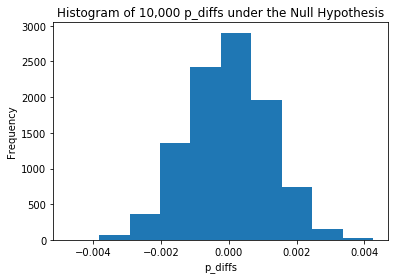

In [28]:
# Plotting a histogram for p_diffs
plt.hist(p_diffs)

# label x-axis, y-axis and title
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Histogram of 10,000 p_diffs under the Null Hypothesis');

>From histogram above, we could notice that the sampling distribution is normal under the null hypothesis.
>
>if the null hypothesis is true, we would expect the difference in proportion of converted new page and converted old page to be zero.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# calculate the actual differene observed in ab_data.csv
# define it as 'diff'
diff = p__converted_treatment - p__converted_control # use p_converted_treatment and p_converted_control calculated at 4b and 4c

# print out the diff
print('The actual differene observed in ab_data.csv is ' + str(diff)) 

The actual differene observed in ab_data.csv is -0.00157823898536


In [30]:
# calculate the proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
# define it as 'pval'
pval=(p_diffs>diff).mean()

# print out the pval
print('The proportion (p_diffs>diff) is ' + str(pval)) 

The proportion (p_diffs>diff) is 0.906


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

---
__Answer:__

The probablity of getting our statistic or a more extreme value (if the null is true) was computed in Part J. This value could be known as "P-value" in scientific studies. The following are some considerations in the P-value calculation.

__Null and Alternative Hyppotheses:__

$H_0$ : $P_{new}$ $\leq$ $P_{old}$

$H_1$ : $P_{new}$ > $P_{old}$

or

$H_0$ : $P_{new}$ - $P_{old}$ $\leq$ 0

$H_1$ : $P_{new}$ - $P_{old}$ > 0

From above, our ($P_{new}$ - $P_{old}$) is greater than 0 in the alternative hypothesis. Therefore, the p-value should be obtained from area where located at right side of the red vertical line at Histogram below. As a result, our p-value is P(p_diffs>diff).

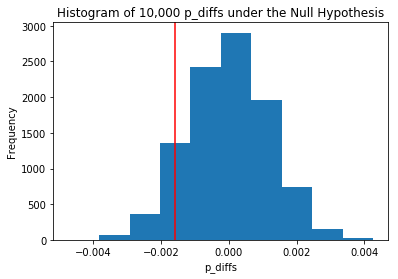

In [31]:
# Plotting a histogram for p_diffs
plt.hist(p_diffs)

# Drawing a vertical line on val
plt.axvline(diff, color='red') #draw a line on x-axis where our actual difference falls on null distribution

# label x-axis, y-axis and title
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Histogram of 10,000 p_diffs under the Null Hypothesis');

Since our p-value obtained from Part J is large, we have evidence that our statistic was likely to come from the null hypothesis. Hence we do not have evidence to rejects the null hypothesis. Therefore, insufficient evidence that the new page is better than old page.

---

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted').count()[0]
convert_new = df2.query('group == "treatment" and converted').count()[0]
n_old = df2.query('group=="control"').count()[0]
n_new = df2.query('group=="treatment"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
# Running Ztest
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

# Printing z-score and p-value
print('The P-Value and Z-Score are ' + str(p_value) + ' and ' + str(z_score) + ' respectively')

The P-Value and Z-Score are 0.905058312759 and -1.31092419842 respectively


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

---

__Answer:__

In [34]:
from scipy.stats import norm

# how significant our z-score is
print('The significant of z-score is ' + str(norm.cdf(z_score)))

# let's pick a significance level. Let's just say it's 95% (alpha = 0.05). 
print('The critical value at 95% confidence is '+ str(norm.ppf(1-(0.05))))


The significant of z-score is 0.094941687241
The critical value at 95% confidence is 1.64485362695


The following statements explain the mean of z-score value computed in the previous question:

1. $H_0$ : $P_{new}$ $\leq$ $P_{old}$

2. $H_1$ : $P_{new}$ > $P_{old}$

3. $\alpha$ = 0.05

4. Critical Zone, $Z_{crit}$ > 1.645 (critical value at 95% confidence)

5. Z-Score = -1.3109. This Z-Score is outside of critical zone.

6. Decision: fail to reject $H_0$. In Conclusion, insufficient evidence that the new page is better than old page, at 5% significance.


In addition, the  p-value calculated in Part I is more than 5% significance. Hence we fail to rejects the null hypothesis. Therefore, insufficient evidence that the new page is better than old page.

Yes, both results computed in Part i is agree with the findings in parts j and k.

---

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

---

__Answer:__

Logistic Regression should be used in this case.

---

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
# add an intercept column into df2
df2['intercept'] = 1

# add an ab_page column into df2
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
# importing statsmodels package
import statsmodels.api as sm

# setup & run the regression model
log_mod = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
# presenting the model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Oct 2018   Pseudo R-squ.:               8.077e-06
Time:                        09:10:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

---
__Answer:__

The p-value associated with ab_page is 0.19, which is differ from the value computed in Part II. The difference is because of the hypotheses used at both question are different. 

In regression, we are using the following hypotheses:

$H_0$ : $\beta_0$ = 0

$H_1$ : $\beta_0$ $\neq$ 0

P-value (0.19) obtained from the regression could be used to check if the slope ($\beta$) of parameter (ab_page) is equal to zero and the null hypothesis. That mean p-value can be used to check if a particular variable is useful for predicting the response.

From the regression model result above, the p-value (0.19) of ab_page is more than 5% significance. Therefore, it is insufficient evidence that the ab_page is statistically significant in relating to an individual converts. 

---

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

---

__Answer:__

With considering other explanatory variables, it might contribute to the significance of our test results and leads to more accurate decisions. The following factors maybe useful for the analysis:

- financial background
- educational background
- age
- gender
- timestamp

Yes, there is some disadvantages of adding additional terms into the regression model as below:

1. `Simpson's paradox` - A trend appears in several different groups of data but disappears or reverses when these groups are combined.

2. `Multicollinearity` is when we have predictor variables that are correlated with one another. One of the main concerns of multicollinearity is that it can lead to coefficients being flipped from the direction we expect from simple linear regression.

---

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

---

In [38]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

# print df_new
df_new.head()

,country,timestamp,group,landing_page,converted,received_new_page,intercept,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,False,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,True,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,True,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,False,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,True,1,1


In [39]:
# observe country column
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
# Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['CA','US']] = pd.get_dummies(df_new['country'])[['CA','US']]

# setup & run the regression model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US']])
results = log_mod.fit()

# presenting model result
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Oct 2018   Pseudo R-squ.:               1.521e-05
Time:                        09:10:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

From the regression model result above, the p-values of CA (0.074) & US (0.456) are more than 5% significance. Therefore, it is insufficient evidence that the country had an impact on conversion. 

---

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

---

In [41]:
### Fit Your Linear Model And Obtain the Results
# setup & run the regression model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'US']])
results = log_mod.fit()

# presenting model result
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Oct 2018   Pseudo R-squ.:               2.323e-05
Time:                        09:10:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

From the regression model result above, the p-values of ab_page (0.191), CA (0.074) & US (0.457) are more than 5% significance. Therefore, it is insufficient evidence that the individual factors of country and page had significant effects on conversion.

In [42]:
# interpretate the model results
1/np.exp(results.params)

intercept    7.238314
ab_page      1.015056
CA           1.051944
US           1.009932
dtype: float64

According to findings above, we could interpret the results as below:

1. An invidual are 1.02 times more likely to be converted than if they access new page, holding all other variables constant.
2. If an invidual access the page, they are 1.05 times more likely to be converted than if they are from CA, holding all other variables constant.
3. Af an invidual access the page, they are 1.01 times more likely to be converted than if they are from US, holding all other variables constant.

---

<a id='conclusions'></a>
## Conclusions

From the analysis above (Part I to III), we could make the following as the conclusion:

---

__Effect of Page on Conversion__

- From Part I, the probability of an individual converting in `control (0.1204)` and `treatment (0.1188)` groups are comparable. Therefore, in practically, there is no sufficient evidence to say that the new treatment page significantly leads to more conversions.

- From Part II and III, the p-value calculated from A/B Tests and p-values of each variables computed from the regression model  are more than 5% significance. Hence we fail to rejects the null hypothesis. Therefore, it is insufficient evidence that new page had statistically significant effects on conversion. 

---

In [43]:
# calculate the probability of an individual converting in UK, US and CA groups
# define them as 'p__converted_UK', 'p__converted_US' and 'p__converted_CA'
p__converted_UK = df_new.query('country=="UK"')['converted'].mean()
p__converted_US = df_new.query('country=="US"')['converted'].mean()
p__converted_CA = df_new.query('country=="CA"')['converted'].mean()

# print out the results
print('The probability of an individual converting in UK, US and CA groups are ' + str(p__converted_UK) + ' , ' + str(p__converted_US) + ' and ' +  str(p__converted_CA) + ' respectively.') 

The probability of an individual converting in UK, US and CA groups are 0.12059448569 , 0.119546800642 and 0.115318297814 respectively.



__Effect of Country on Conversion__

- From calculation above, we could notice that the probability of an individual converting in `UK (0.1206)`, `US (0.1195)` and `CA (0.1153)` groups are comparable. Therefore, there is no sufficient evidence to say that the individual factors of country had practically significant effects on conversion.
- From Part III, the p-values of each variables computed from the regression model are more than 5% significance. Hence we fail to rejects the null hypothesis. Therefore, it is insufficient evidence that the individual factors of country had statistically significant effects on conversion.

---

In conclusion, we should recommend the company to keep the old page instead of implement the new page. This is because it is insufficient evidence that new page had statistically and practically significant effects on conversion. 
